## Entanglement witnessing

We have a quantum state $\rho_{AB}$ and we want to know if it is entangled or not. So we solve the SDP 

$$
\begin{aligned}
\max & \quad \lambda \\
\mathrm{s.t.} & \quad \rho_{AB}^{T_A} - \lambda \mathbb{I}_{AB} \geq 0\\
\end{aligned}
$$

where $\rho_{AB}^{T_A}$ denotes the partial transpose over system $A$. Note that the SDP is computing the smallest eigenvalue of $\rho_{AB}^{T_A}$. If we find it to be negative then it is impossible for $\rho_{AB}$ to be separable and hence is must be entangled!

We can also look at the dual SDP in this context which has a very nice operational interpretation. 
$$
\begin{aligned}
\min & \quad \mathrm{Tr}[\rho_{AB} W] \\
\mathrm{s.t.} & \quad \mathrm{Tr}[W] = 1 \\
& \quad W^{T_A} \geq 0 \\
\end{aligned}
$$

$W$ is a Hermitian matrix. Any feasible point of the dual program gives an observable $W$ whose expectation upper bounds the minimal eigenvalue of $\rho_{AB}^{T_A}$ for ANY $\rho_{AB}$. Thus, this gives an experimental procedure to detect entanglement: measure $W$ and check if negative!


## Example

Consider the system 
$$
\rho = p |\Phi^+\rangle \langle \Phi^+| + (1-p) \mathbb{I}/4
$$
with $p \in [0,1]$ and $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$.

A straightforward calculation gives that the minimum eigenvalue of $\rho_{AB}^{T_A}$ is 
$$
\frac{1-3p}{4}
$$
and hence the state is entangled for all $p > 1/3$.

Let's check that minimal eigenvalue via an SDP

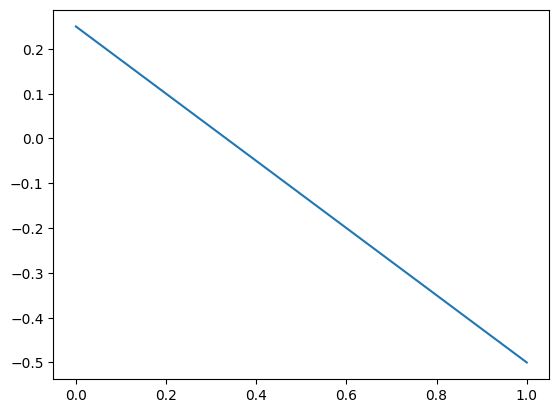

In [1]:
import picos as pic # Python package to optimize SDPs
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
np.set_printoptions(precision=4, suppress = True)

def primal_EW(p):
    # Computes primal SDP for mixing value p 
    
    id = pic.Constant(np.eye(4))
    rho = pic.Constant(p * np.array([[1/2,0,0,1/2],
                           [0,0,0,0],
                           [0,0,0,0],
                           [1/2,0,0,1/2]]) + (1-p) * id /4)
    
    
    SDP = pic.Problem()
    l = pic.RealVariable('l')
    SDP.set_objective('max', l)
    SDP.add_constraint(pic.partial_transpose(rho) - l * id >> 0)
    
    SDP.solve()
    
    return round(SDP, 4)


# Let's plot the data
pvals = np.linspace(0,1,10)
data = [primal_EW(p) for p in pvals]

plt.plot(pvals,data)
plt.show()


Optimal entanglement witness:
 [[ 0. +0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0.5+0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j  0. +0.j]]


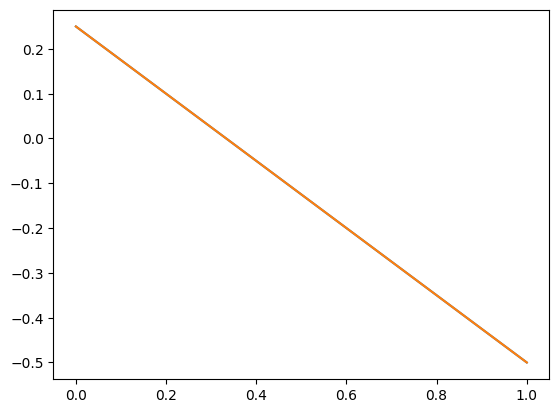

In [2]:
# Now let's solve the dual 

def dual_EW(p):
    # Computes primal SDP for mixing value p 
    
    id = pic.Constant(np.eye(4))
    rho = pic.Constant(p * np.array([[1/2,0,0,1/2],
                           [0,0,0,0],
                           [0,0,0,0],
                           [1/2,0,0,1/2]]) + (1-p) * id /4)
    
    
    SDP = pic.Problem()
    W = pic.HermitianVariable('W', [4,4])
    SDP.set_objective('min', pic.trace(rho * W))
    SDP.add_constraint(pic.trace(W) == 1)
    SDP.add_constraint(pic.partial_transpose(W) >> 0)
    
    SDP.solve()
    
    return round(SDP, 4), np.array(W.value)

res, W = dual_EW(1/3)
print('Optimal entanglement witness:\n', W)
pvals = np.linspace(0,1,10)
states = [p * np.array([[1/2,0,0,1/2],
                           [0,0,0,0],
                           [0,0,0,0],
                           [1/2,0,0,1/2]]) + (1-p) * np.eye(4) /4 for p in pvals]
data_dual = [np.real(np.trace(np.matmul(W, rho))) for rho in states]
plt.plot(pvals, data)
plt.plot(pvals, data_dual)
plt.show()